In [2]:

import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

/tmp/ipython-input-3159502391.py:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


In [ ]:
i = np.array([8,5,-4])
w = np.array([0.5,0.3,0.2])
o = np.sign(i.dot(w)) #non linear sgn function

4.7


#Simple linear regression using neural networks

Separating hyperplane
- is a boundary that binarises and categorises data.
- It is used as a decision boundary

Feature space
- is a graphical representation where,
- each axis is a dimension of the data,
- and each point (scatter point) represents input data values

Backpropagation
- error signal needs to propagate backward through each node
- back propagation is just gradient descent
- chain rule of derivatives is used
- x-axis is now the weights axis
- its essentially gradient descent in multi dimensions

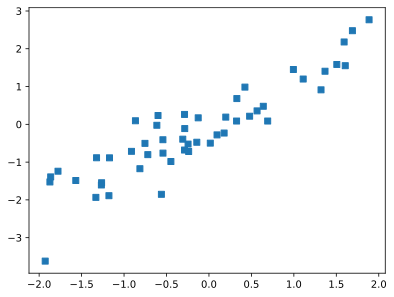

In [16]:
#create data
N = 50
x = torch.randn(N,1)
y = x + torch.randn(N,1)/2
plt.plot(x,y,'s')
plt.show()

In [20]:
#build model
ANNreg = nn.Sequential(
    nn.Linear(1,1) #input layer
    nn.ReLU(), #activation function
    nn.Linear(1,1) #output layer
)

ANNreg

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

In [22]:
#learning rate
learningRate = 0.05

#loss function
lossfun = nn.MSELoss()

#optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(ANNreg.parameters(),lr = learningRate )
#https://docs.pytorch.org/docs/stable/generated/torch.optim.SGD.html

In [27]:
#train the model
numepochs = 500
losses = torch.zeros(numepochs)

for epochi in range(numepochs):
  #forward pass
  yHat = ANNreg(x)

  #compute loss
  loss = lossfun(yHat,y)
  losses[epochi] = loss

  #backprop
  optimizer.zero_grad() #initialize all gradients to 0
  loss.backward() #backprop based on losses
  optimizer.step() #housekeeping functions of SGD

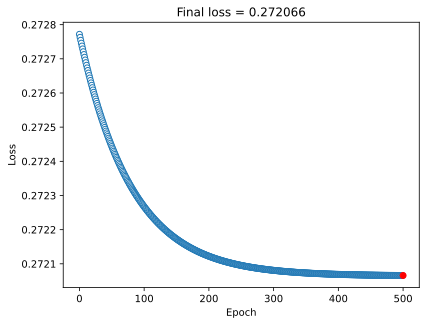

In [28]:
#show the losses

#manually compute losses
#final forward pass
predictions = ANNreg(x)

#final loss (MSE)
testloss = (predictions - y).pow(2).mean()

plt.plot(losses.detach(),'o',markerfacecolor = 'w',linewidth = 0.1)
plt.plot(numepochs,testloss.detach(),'ro') #detach isolates loss value from gradient in output #testloss.item() returns scalar instead of tensor
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Final loss = %g' %testloss.item())
plt.show()


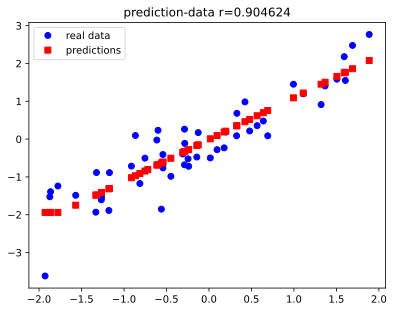

In [31]:
plt.plot(x,y,'bo',label = 'real data')
plt.plot(x,predictions.detach(),"rs", label = "predictions")
plt.title(f'prediction-data r={np.corrcoef(y.T,predictions.detach().T)[0,1]:2f}')
plt.legend()
plt.show()